## Table of Contents

* [Import Libraries](#import-libraries)
* [Load CSV Files](#load-csv-files)
* [Data Cleaning](#data-cleaning)
    * [Convert UTC to Readable Date and Time](#convert-utc-to-readable-date-and-time)
    * [Missing Values](#missing-values)
    * [Remove Duplicates, NaN, and Special Characters](#remove-duplicates-nan-and-special-characters)
    * [Look at Lengths and Word Counts in Title and Text](#look-at-lengths-and-word-counts-in-title-and-text)
    * [Manually Drop Rows](#manually-drop-rows)
* [EDA](#eda)
    * [EDA on Title and Text Lengths](#eda-on-title-and-text-length)
    * [Title Length Visualization](#title-length-visualization)
    * [Text Length Visualization](#text-length-visualization)
    * [EDA on Title and Text Word Count](#eda-on-title-and-text-word-count)
    * [Title Word Count Visualization](#title-word-count-visualization)
    * [Text Word Count Visualization](#text-word-count-visualization)
    * [Correlation Tables](#correlation-tables)
* [Combine DataFrames](#combine-dataframes)
* [Combined Data Visualizations](#combined-data-visualizations)
    * [Histplot Visualizations](#histplot-visualizations)
    * [Heatmap Visualization](#heatmap-visualization)
* [Save Cleaned DataFrames and Combined DataFrame as CSV Files](#save-cleaned-dataframes-and-combined-dataframe-as-csv-files)

# Import Libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV Files

In [230]:
# Load psychonaut dataframe
psychonaut_df = pd.read_csv('../raw_data/psychonaut_raw.csv')

In [231]:
# Load microdosing dataframe
microdosing_df = pd.read_csv('../raw_data/microdosing_raw.csv')

# Data Cleaning

## Convert UTC to Readable Date and Time

- Function to convert UTC to DateTime

In [232]:
def convert_utc(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name], unit='s')
    return df

In [233]:
# Convert Psychonaut dataframe
convert_utc(psychonaut_df, 'time')

# Convert Microsoding dataframe
convert_utc(microdosing_df, 'time')

,time,title,text
0,2023-06-16 18:25:25,Taking a week off. Experiences?,I have to take a week off from micro-dosing be...
1,2023-06-16 16:54:05,Regular microdosers...reported improvements in...,NaN
2,2023-06-16 15:54:22,Thinking about bumping up microcose amount,Second week of microdosing. Got some capsules ...
3,2023-06-16 15:09:44,Will 2CB affect me microdosing mushrooms?,NaN
4,2023-06-16 14:40:52,Somatic effects,I recently learned that some cubes have more o...
...,...,...,...
3925,2020-05-02 20:29:31,How much of LSD is this? First timer using,NaN
3926,2023-04-08 13:25:46,What’s your thoughts on /r/LionsManeRecovery? ...,It’d be nice to see some sort of official stan...
3927,2022-09-16 20:53:45,Is this 2 micro doses?,NaN
3928,2021-04-06 07:06:41,All of us must remember DIET plays a huge roll,"Not to be entirely a party pooper Butt, everyo..."


## Missing Values

In [234]:
psychonaut_df.isnull().sum()

time        0
title       0
text     1051
dtype: int64

In [235]:
microdosing_df.isnull().sum()

time       0
title      0
text     936
dtype: int64

## Remove Duplicates, NaN, and Special Characters

- Function to remove duplicates and to remove special characters

In [236]:
def preprocess_columns(df, column):
    df.drop_duplicates(subset=column, inplace=True)
    df[column].dropna(inplace=True)
    df = df[df[column].str.contains(r'\w+', na=False)]
    return df

In [237]:
# Remove duplicate and special characters from psychonaut dataframe
preprocess_columns(psychonaut_df, 'title')
preprocess_columns(psychonaut_df, 'text')

# Remove duplicate and special characters from microdosing dataframe
preprocess_columns(microdosing_df, 'title')
preprocess_columns(microdosing_df, 'text')

,time,title,text
0,2023-06-16 18:25:25,Taking a week off. Experiences?,I have to take a week off from micro-dosing be...
2,2023-06-16 15:54:22,Thinking about bumping up microcose amount,Second week of microdosing. Got some capsules ...
4,2023-06-16 14:40:52,Somatic effects,I recently learned that some cubes have more o...
5,2023-06-16 13:47:56,Lion’s mane everyday or only on MD days?,I’m about to add Lion’s mane but I don’t know ...
6,2023-06-16 13:06:28,Synesthesia and Microdosing,"Given that I already possess synesthesia, and ..."
...,...,...,...
3919,2021-08-26 17:35:38,Brown sperm caused by microdosing?,tldr; Anyone else experienced brown sperm from...
3921,2021-08-30 11:17:29,Long term effects of p. Cubensis cronic consum...,So my bf started microdosing about 2 years ago...
3924,2022-11-25 00:51:48,First timer - Psilocybin,I don't have micro scales so my friend said I ...
3926,2023-04-08 13:25:46,What’s your thoughts on /r/LionsManeRecovery? ...,It’d be nice to see some sort of official stan...


## Look at Lengths and Word Counts in Title and Text

- Function to calculate length of title and create new column

In [238]:
def add_column_length(df, column_name, new_column_name):
    df[new_column_name] = df[column_name].fillna('').apply(len)
    return df

In [239]:
# Add title_length column
add_column_length(psychonaut_df, 'title', 'title_length')
add_column_length(microdosing_df, 'title', 'title_length')

# Add text_length to column
add_column_length(psychonaut_df, 'text', 'text_length')
add_column_length(microdosing_df, 'text', 'text_length')

,time,title,text,title_length,text_length
0,2023-06-16 18:25:25,Taking a week off. Experiences?,I have to take a week off from micro-dosing be...,31,253
1,2023-06-16 16:54:05,Regular microdosers...reported improvements in...,NaN,184,0
2,2023-06-16 15:54:22,Thinking about bumping up microcose amount,Second week of microdosing. Got some capsules ...,42,291
4,2023-06-16 14:40:52,Somatic effects,I recently learned that some cubes have more o...,15,133
5,2023-06-16 13:47:56,Lion’s mane everyday or only on MD days?,I’m about to add Lion’s mane but I don’t know ...,40,224
...,...,...,...,...,...
3919,2021-08-26 17:35:38,Brown sperm caused by microdosing?,tldr; Anyone else experienced brown sperm from...,34,1017
3921,2021-08-30 11:17:29,Long term effects of p. Cubensis cronic consum...,So my bf started microdosing about 2 years ago...,80,418
3924,2022-11-25 00:51:48,First timer - Psilocybin,I don't have micro scales so my friend said I ...,24,222
3926,2023-04-08 13:25:46,What’s your thoughts on /r/LionsManeRecovery? ...,It’d be nice to see some sort of official stan...,149,223


- Function to calculate number of words and create new column

In [240]:
def add_word_length(df, column_name, new_column_name):
    df[new_column_name] = df[column_name].fillna('').str.split().apply(len)
    return df

In [241]:
# Add title_word_count column
add_word_length(psychonaut_df, 'title', 'title_word_count')
add_word_length(microdosing_df, 'title', 'title_word_count')

# Add text_word_count column
add_word_length(psychonaut_df, 'text', 'text_word_count')
add_word_length(microdosing_df, 'text', 'text_word_count')

,time,title,text,title_length,text_length,title_word_count,text_word_count
0,2023-06-16 18:25:25,Taking a week off. Experiences?,I have to take a week off from micro-dosing be...,31,253,5,46
1,2023-06-16 16:54:05,Regular microdosers...reported improvements in...,NaN,184,0,24,0
2,2023-06-16 15:54:22,Thinking about bumping up microcose amount,Second week of microdosing. Got some capsules ...,42,291,6,55
4,2023-06-16 14:40:52,Somatic effects,I recently learned that some cubes have more o...,15,133,2,25
5,2023-06-16 13:47:56,Lion’s mane everyday or only on MD days?,I’m about to add Lion’s mane but I don’t know ...,40,224,8,42
...,...,...,...,...,...,...,...
3919,2021-08-26 17:35:38,Brown sperm caused by microdosing?,tldr; Anyone else experienced brown sperm from...,34,1017,5,174
3921,2021-08-30 11:17:29,Long term effects of p. Cubensis cronic consum...,So my bf started microdosing about 2 years ago...,80,418,13,74
3924,2022-11-25 00:51:48,First timer - Psilocybin,I don't have micro scales so my friend said I ...,24,222,4,45
3926,2023-04-08 13:25:46,What’s your thoughts on /r/LionsManeRecovery? ...,It’d be nice to see some sort of official stan...,149,223,23,40


## Manually Drop Rows

- Rows were dropped because they contained NaN and were not dropped with the function above

In [242]:
psychonaut_df.drop(index=11, inplace=True)

In [243]:
psychonaut_df.shape

(2007, 7)

In [244]:
microdosing_df.drop(index=1, inplace=True)

In [245]:
microdosing_df.shape

(2026, 7)

In [246]:
psychonaut_df.isnull().sum()

time                0
title               0
text                0
title_length        0
text_length         0
title_word_count    0
text_word_count     0
dtype: int64

In [247]:
microdosing_df.isnull().sum()

time                0
title               0
text                0
title_length        0
text_length         0
title_word_count    0
text_word_count     0
dtype: int64

# EDA

## EDA on Title and Text Lengths

- Function for top n longest and shortest title or text lengths

In [248]:
def longest_title_or_text_length(df, column_name, n):
    return df[column_name].sort_values(ascending=False).head(n)
    
def shortest_title_or_text_length(df, column_name, n):
    return df[column_name].sort_values(ascending=True).head(n)

In [249]:
# Return top 5 longest titles for psychonaut dataframe
print('Top 5 longest title length:')
print(longest_title_or_text_length(psychonaut_df, 'title_length', 5))

# Return top 5 shortest titles for psychonaut dataframe
print('Top 5 shortest title length:')
print(shortest_title_or_text_length(psychonaut_df, 'title_length', 5))

# Return top 5 longest texts for psychonaut dataframe
print('Top 5 longest text length:')
print(longest_title_or_text_length(psychonaut_df, 'text_length', 5))

# Return top 5 shortest texts for psychonaut dataframe
print('Top 5 shortest text length:')
print(shortest_title_or_text_length(psychonaut_df, 'text_length', 5))

Top 5 longest title length:
2592    299
1978    298
3303    298
2442    298
3712    298
Name: title_length, dtype: int64
Top 5 shortest title length:
3640    1
2568    2
31      3
922     3
3680    3
Name: title_length, dtype: int64
Top 5 longest text length:
3313    32503
2787    24704
472     24255
2823    15957
3496    15941
Name: text_length, dtype: int64
Top 5 shortest text length:
2711    2
60      3
3168    3
3483    4
3130    4
Name: text_length, dtype: int64


In [250]:
# Return top 5 longest titles for microdosing dataframe
print('Top 5 longest title length:')
print(longest_title_or_text_length(microdosing_df, 'title_length', 5))

# Return top 5 shortest titles for microdosing dataframe
print('Top 5 shortest title length:')
print(shortest_title_or_text_length(microdosing_df, 'title_length', 5))

# Return top 5 longest texts for microdosing dataframe
print('Top 5 longest text length:')
print(longest_title_or_text_length(microdosing_df, 'text_length', 5))

# Return top 5 shortest texts for microdosing dataframe
print('Top 5 shortest text length:')
print(shortest_title_or_text_length(microdosing_df, 'text_length', 5))

Top 5 longest title length:
2272    290
2451    278
2874    260
516     254
2294    244
Name: title_length, dtype: int64
Top 5 shortest title length:
3902    4
3533    6
3454    7
3848    7
3834    8
Name: title_length, dtype: int64
Top 5 longest text length:
2715    34914
2887    28248
2477    21036
2824    16964
423     11806
Name: text_length, dtype: int64
Top 5 shortest text length:
3235    1
3162    1
168     2
924     2
2431    3
Name: text_length, dtype: int64


## Title Length Visualization

- Histogram visualizations for both dataframes

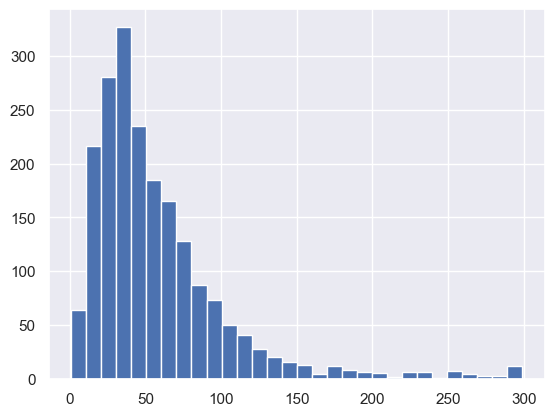

In [251]:
# Psychonaut dataframe
psychonaut_df.title_length.hist(bins=30);

> Image above exibits right skew

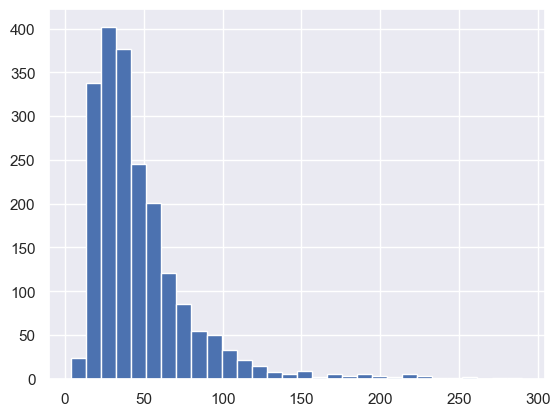

In [252]:
# Microdosing dataframe
microdosing_df.title_length.hist(bins=30);

> Image above exhibits right skew

## Text length Visualization

- Histogram visualizations for both dataframes

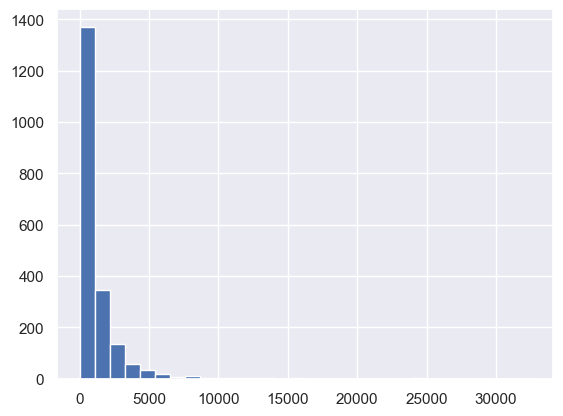

In [253]:
# Psychonaut dataframe
psychonaut_df.text_length.hist(bins=30);

> Image above exhibits heavy right skew

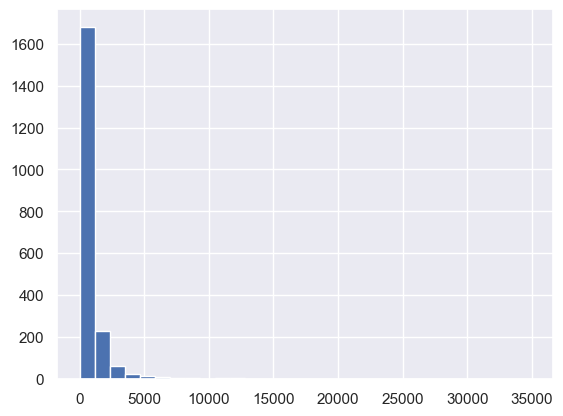

In [254]:
# Microdosing dataframe
microdosing_df.text_length.hist(bins=30);

## EDA on Title and Text Word Count

- Function for top n longest and shortest title or text word counts

In [255]:
def longest_title_or_text_word_count(df, column_name, n):
    return df[column_name].sort_values(ascending=False).head(n)
    
def shortest_title_or_text_word_count(df, column_name, n):
    return df[column_name].sort_values(ascending=True).head(n)

In [256]:
# Return top 5 longest title word counts for psychonaut dataframe
print('Top 5 longest title word count:')
print(longest_title_or_text_word_count(psychonaut_df, 'title_word_count', 5))

# Return top 5 shortest title word counts for psychonaut dataframe
print('Top 5 shortest title word count:')
print(shortest_title_or_text_word_count(psychonaut_df, 'title_word_count', 5))

# Return top 5 longest text word counts for psychonaut dataframe
print('Top 5 longest text word count:')
print(longest_title_or_text_word_count(psychonaut_df, 'text_word_count', 5))

# Return top 5 shortest text word counts for psychonaut dataframe
print('Top 5 shortest text word count:')
print(shortest_title_or_text_word_count(psychonaut_df, 'text_word_count', 5))

Top 5 longest title word count:
598     64
3712    59
3610    58
2765    58
2592    56
Name: title_word_count, dtype: int64
Top 5 shortest title word count:
49      1
280     1
3859    1
805     1
3371    1
Name: title_word_count, dtype: int64
Top 5 longest text word count:
3313    6022
472     4619
2787    4358
2823    3166
3496    2831
Name: text_word_count, dtype: int64
Top 5 shortest text word count:
516     1
2711    1
187     1
3458    1
192     1
Name: text_word_count, dtype: int64


In [257]:
# Return top 5 longest title word counts for microdosing dataframe
print('Top 5 longest title word count:')
print(longest_title_or_text_word_count(microdosing_df, 'title_word_count', 5))

# Return top 5 shortest title word counts for microdosing dataframe
print('Top 5 shortest title word count:')
print(shortest_title_or_text_word_count(microdosing_df, 'title_word_count', 5))

# Return top 5 longest text word counts for microdosing dataframe
print('Top 5 longest text word count:')
print(longest_title_or_text_word_count(microdosing_df, 'text_word_count', 5))

# Return top 5 shortest text word counts for microdosing dataframe
print('Top 5 shortest text word count:')
print(shortest_title_or_text_word_count(microdosing_df, 'text_word_count', 5))

Top 5 longest title word count:
2272    57
2566    47
2451    43
2775    42
349     40
Name: title_word_count, dtype: int64
Top 5 shortest title word count:
931     1
3257    1
3141    1
3875    1
3890    1
Name: title_word_count, dtype: int64
Top 5 longest text word count:
2887    4458
2477    3316
2715    3132
2824    2693
2594    2240
Name: text_word_count, dtype: int64
Top 5 shortest text word count:
2182    1
3182    1
3336    1
2827    1
168     1
Name: text_word_count, dtype: int64


## Title Word Count Visualization

- Histogram visualizations for both dataframes

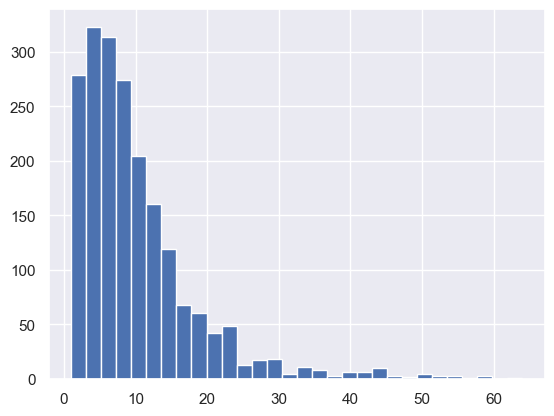

In [258]:
# Psychonaut dataframe
psychonaut_df.title_word_count.hist(bins=30);

> Image above exhibits heavy right skew

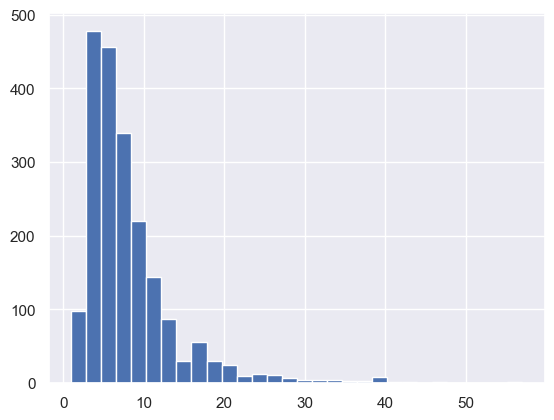

In [259]:
# Microdosing dataframe
microdosing_df.title_word_count.hist(bins=30);

> Image above exhibits right skew

## Text Word Count Visualization

- Histogram visualizations for both dataframes

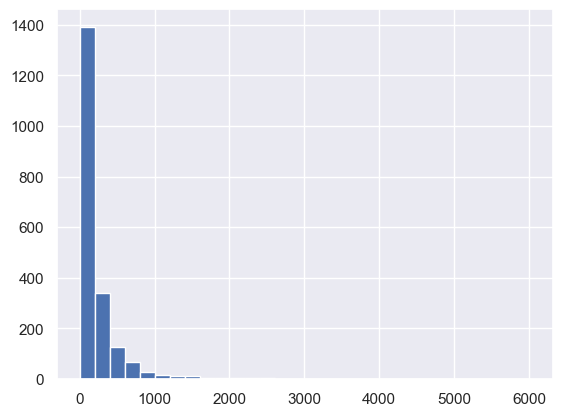

In [260]:
# Psychonaut dataframe
psychonaut_df.text_word_count.hist(bins=30);

> Image above exhibits heavy right skew

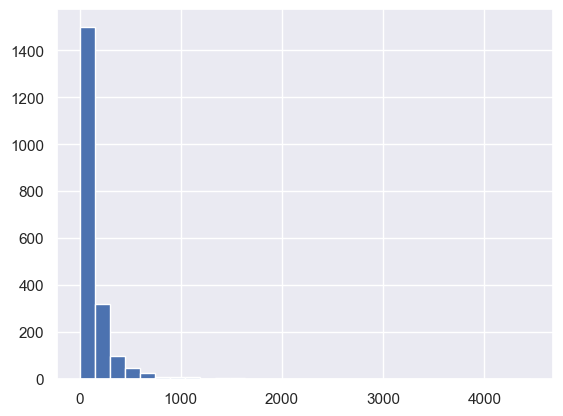

In [261]:
# Microdosing dataframe
microdosing_df.text_word_count.hist(bins=30);

> Image above exhibits heavy right skew

## Correlation Tables

In [262]:
# Psychonaut correlation
psychonaut_df.corr()

C:\Users\Crypt\AppData\Local\Temp\ipykernel_15204\1245713965.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  psychonaut_df.corr()


,title_length,text_length,title_word_count,text_word_count
title_length,1.000000,0.087534,0.978518,0.076102
text_length,0.087534,1.000000,0.082073,0.996517
title_word_count,0.978518,0.082073,1.000000,0.074300
text_word_count,0.076102,0.996517,0.074300,1.000000


In [263]:
# Microdosing correlation
microdosing_df.corr()

C:\Users\Crypt\AppData\Local\Temp\ipykernel_15204\2951093146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  microdosing_df.corr()


,title_length,text_length,title_word_count,text_word_count
title_length,1.000000,0.138348,0.964744,0.115350
text_length,0.138348,1.000000,0.103080,0.966115
title_word_count,0.964744,0.103080,1.000000,0.086844
text_word_count,0.115350,0.966115,0.086844,1.000000


# Combine DataFrames

In [264]:
# Add 'target' column to indicate subreddit category
psychonaut_df['target'] = 1
microdosing_df['target'] = 0

# Concatenate both datasets
combined_df = pd.concat([psychonaut_df, microdosing_df], ignore_index=True)

# Create dataframe
combined_df = combined_df[['target', 'title', 'text', 'title_length', 'text_length',
       'title_word_count', 'text_word_count']]

In [265]:
combined_df.shape

(4033, 7)

# Combined Data Visualizations

## Histplot Visualizations

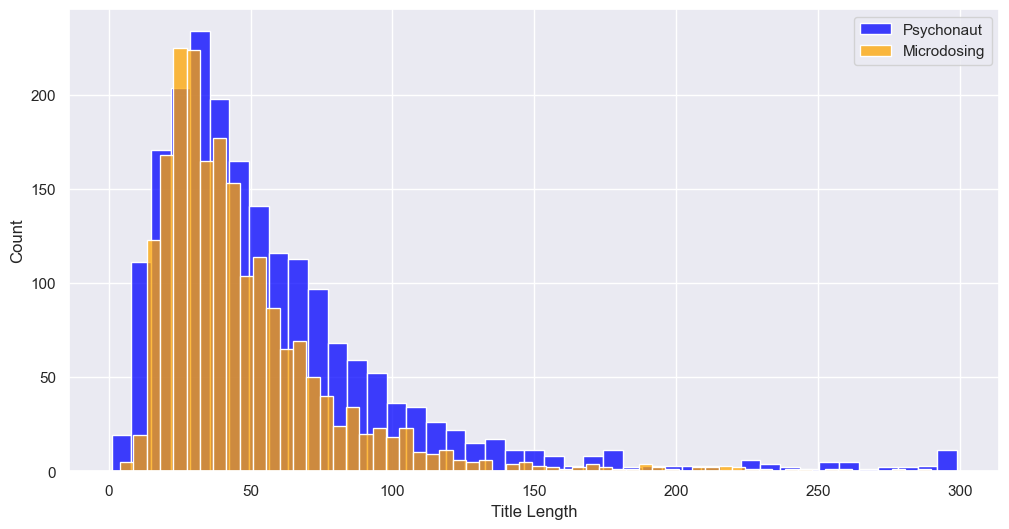

In [271]:
# Histplot - Title Length by Subreddit
psychonaut_lengths = combined_df[combined_df['target'] == 1]['title_length']
microdosing_lengths = combined_df[combined_df['target'] == 0]['title_length']

plt.figure(figsize=(12,6))

sns.set(style="darkgrid")

sns.histplot(psychonaut_lengths, color='blue', label='Psychonaut')
sns.histplot(microdosing_lengths, color='orange', label='Microdosing')

plt.xlabel('Title Length')
plt.ylabel('Count')
plt.legend()
plt.savefig('title_length.png')
plt.show();

> Image is right skew but Psychonaut has higher count and title length

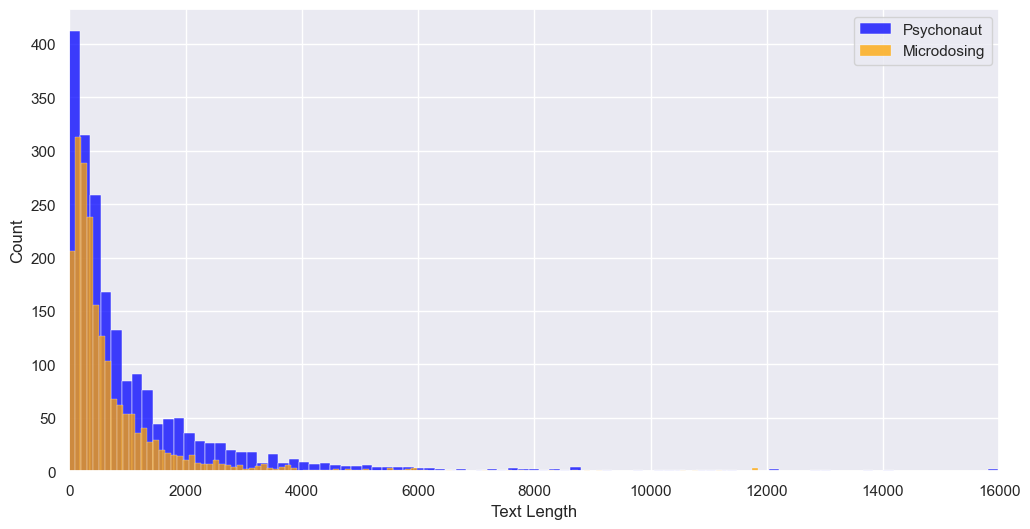

In [272]:
# Histplot - Text Length by Subreddit
psychonaut_lengths = combined_df[combined_df['target'] == 1]['text_length']
microdosing_lengths = combined_df[combined_df['target'] == 0]['text_length']

plt.figure(figsize=(12,6))

sns.set(style="darkgrid")

sns.histplot(psychonaut_lengths, color='blue', label='Psychonaut')
sns.histplot(microdosing_lengths, color='orange', label='Microdosing')

plt.xlabel('Text Length')
plt.ylabel('Count')
plt.xlim(0, 16_000)
plt.legend()
plt.savefig('text_length.png')
plt.show();

> Image is right skew but Psychonaut has higher count and text length

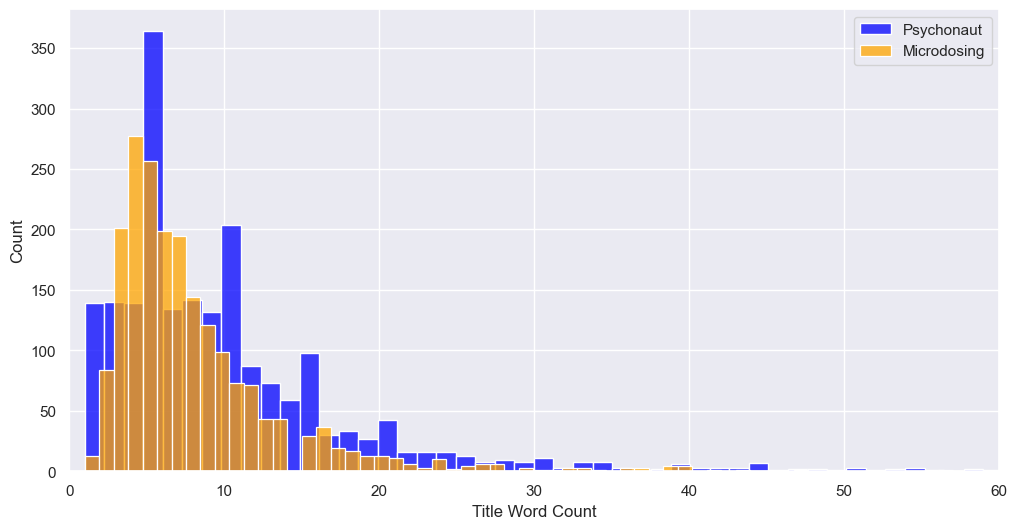

In [273]:
## Histplot - Title Word Count by Subreddit
psychonaut_word_count = combined_df[combined_df['target'] == 1]['title_word_count']
microdosing_word_count = combined_df[combined_df['target'] == 0]['title_word_count']

plt.figure(figsize=(12,6))

sns.set(style="darkgrid")

sns.histplot(psychonaut_word_count, color='blue', label='Psychonaut')
sns.histplot(microdosing_word_count, color='orange', label='Microdosing')

plt.xlabel('Title Word Count')
plt.ylabel('Count')
plt.xlim(0, 60)
plt.legend()
plt.savefig('title_wc.png')
plt.show();

> Right skew but Psychonaut has higher title word count and frequency

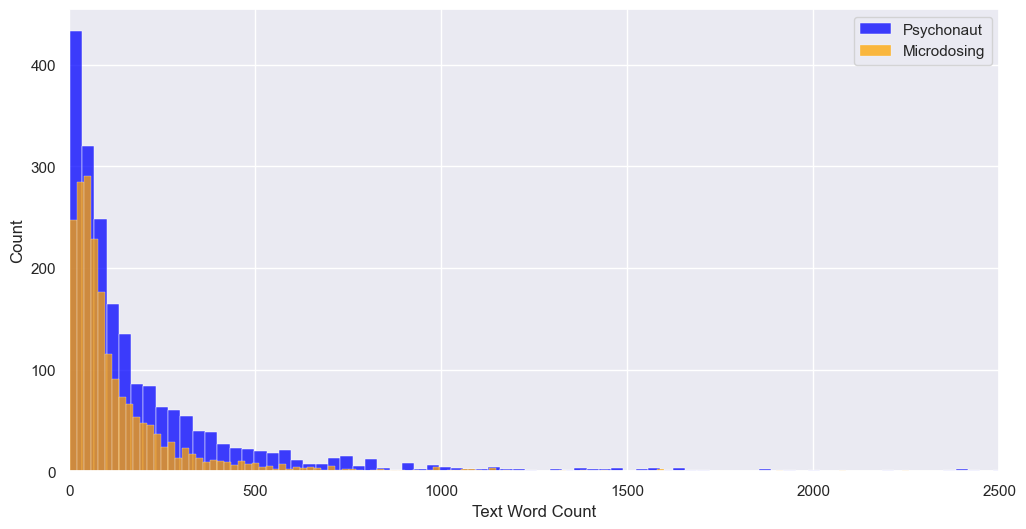

In [274]:
# Histplot - Text Word Count by Subreddit
psychonaut_word_count = combined_df[combined_df['target'] == 1]['text_word_count']
microdosing_word_count = combined_df[combined_df['target'] == 0]['text_word_count']

plt.figure(figsize=(12,6))

sns.set(style="darkgrid")

sns.histplot(psychonaut_word_count, color='blue', label='Psychonaut')
sns.histplot(microdosing_word_count, color='orange', label='Microdosing')

plt.xlabel('Text Word Count')
plt.ylabel('Count')
plt.xlim(0, 2500)
plt.legend()
plt.savefig('text_wc.png')
plt.show();

> Right skew but Psychonaut has higher frequency and text word count

## Heatmap Visualization

C:\Users\Crypt\AppData\Local\Temp\ipykernel_15204\2498119171.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combined_df.corr()[['target']].sort_values('target', ascending=False),


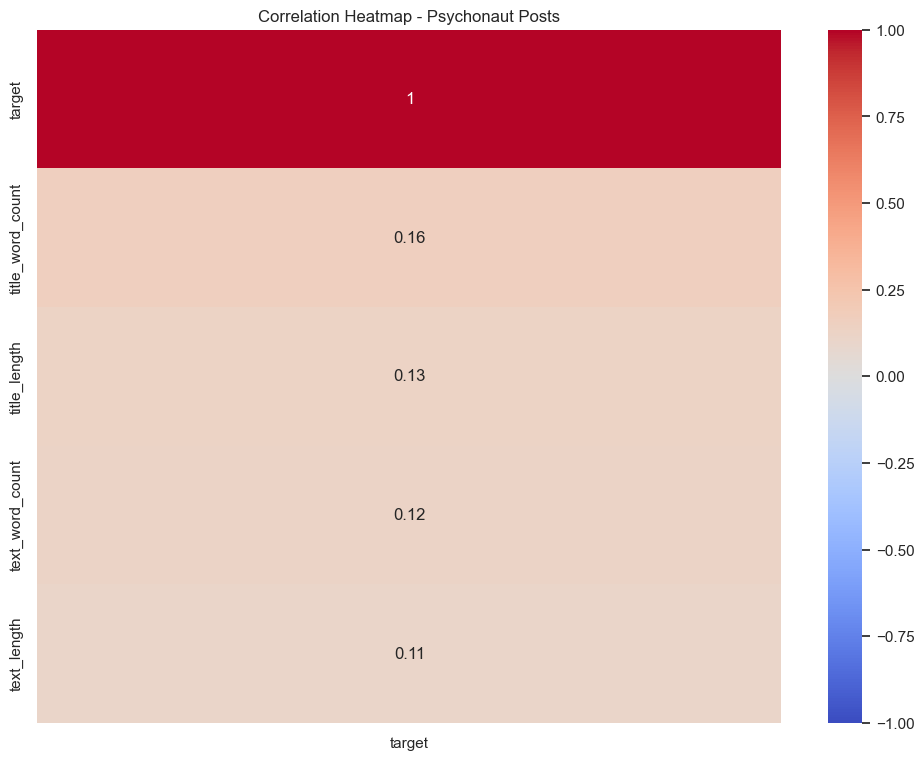

In [270]:
# Psychonaut dataframe
plt.figure(figsize=(12, 9))
sns.heatmap(combined_df.corr()[['target']].sort_values('target', ascending=False),
            annot=True, 
            cmap='coolwarm', 
            vmin=-1,
            vmax=1)

plt.title('Correlation Heatmap - Psychonaut Posts')
plt.show();

> No correlation between the target with title/text word count or length

# Save Cleaned DataFrames and Combined DataFrame as CSV Files

In [223]:
# Save psychonaut dataframe
psychonaut_df.to_csv('../clean_data/psychonaut_clean.csv', index=False)
# Save microdosing dataframe
microdosing_df.to_csv('../clean_data/microdosing_clean.csv', index=False)
# Save combined dataframe
combined_df.to_csv('../clean_data/combined_df.csv', index=False)